#OPEN DATA SET

---




In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [38]:
folder_dir = "customer_shopping_data.csv"
df = pd.read_csv(folder_dir)
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


# INFORMATION DATA

---




In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [40]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [41]:
df.invoice_date = pd.to_datetime(df['invoice_date'],format="%d/%m/%Y")
#It created two more colums in whichs ones i 
df['year']=df.invoice_date.dt.year
df['month']=df.invoice_date.dt.month
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10
...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,2022,9
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,2021,9
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,2021,3
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,2021,3


In [42]:
count_year=pd.DataFrame(df.year.value_counts())


In [43]:
def change_Dollars(df,feature):
  #convert the turkish money to dollars
  df['Price Dollars $']=np.round(df[feature]*0.052,2)

change_Dollars(df,'price')
df['Price Turkey']=df['price']
df=df.drop(['price'],axis=1)
#added a column for the pice in turkey to have more order

In [44]:
df

,invoice_no,customer_id,gender,age,category,quantity,payment_method,invoice_date,shopping_mall,year,month,Price Dollars $,Price Turkey
0,I138884,C241288,Female,28,Clothing,5,Credit Card,2022-08-05,Kanyon,2022,8,78.02,1500.40
1,I317333,C111565,Male,21,Shoes,3,Debit Card,2021-12-12,Forum Istanbul,2021,12,93.63,1800.51
2,I127801,C266599,Male,20,Clothing,1,Cash,2021-11-09,Metrocity,2021,11,15.60,300.08
3,I173702,C988172,Female,66,Shoes,5,Credit Card,2021-05-16,Metropol AVM,2021,5,156.04,3000.85
4,I337046,C189076,Female,53,Books,4,Cash,2021-10-24,Kanyon,2021,10,3.15,60.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,Credit Card,2022-09-21,Kanyon,2022,9,3.05,58.65
99453,I325143,C569580,Male,27,Food & Beverage,2,Cash,2021-09-22,Forum Istanbul,2021,9,0.54,10.46
99454,I824010,C103292,Male,63,Food & Beverage,2,Debit Card,2021-03-28,Metrocity,2021,3,0.54,10.46
99455,I702964,C800631,Male,56,Technology,4,Cash,2021-03-16,Istinye Park,2021,3,218.40,4200.00


In [45]:
df_gender=pd.DataFrame(columns=[ '','gender'])
w=0
ind=list(df.gender.value_counts().index)
count=list(df.gender.value_counts())
for i,c in zip(ind,count):
    df_gender.loc[w]=[i,c]
    w=w+1


df_gender.set_index('',inplace=True)
df_gender

,gender
,
Female,59482
Male,39975


#GENDERS DISTRIBUTION 


---


In [46]:
mean_fe = str((round(df_gender.loc['Female']/df.gender.value_counts().sum(),2)[0])*100)+"%"
mean_ma = str((round(df_gender.loc['Male']/df.gender.value_counts().sum(),2)[0])*100)+"%"
means_=[mean_fe,mean_ma]
means_
#Obtains the rounded promedy of the mean of each row

['60.0%', '40.0%']

In [47]:
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')

def showvalues (X,Y,means_):
  #show the total of the bar, and show the mean of each bar
  for i in range(len(X)):
    plt.text(X[i],Y[i],Y[i],ha="center",size =18) 
    plt.text(X[i],Y[i]/2,means_[i],ha="center",size =18) 

def showvalues_1 (X,Y):

  for i in range(len(X)):
    plt.text(X[i],Y[i],Y[i],ha="center",size =18) 


In [48]:
colors = ['#87DDCD','#F0A841']

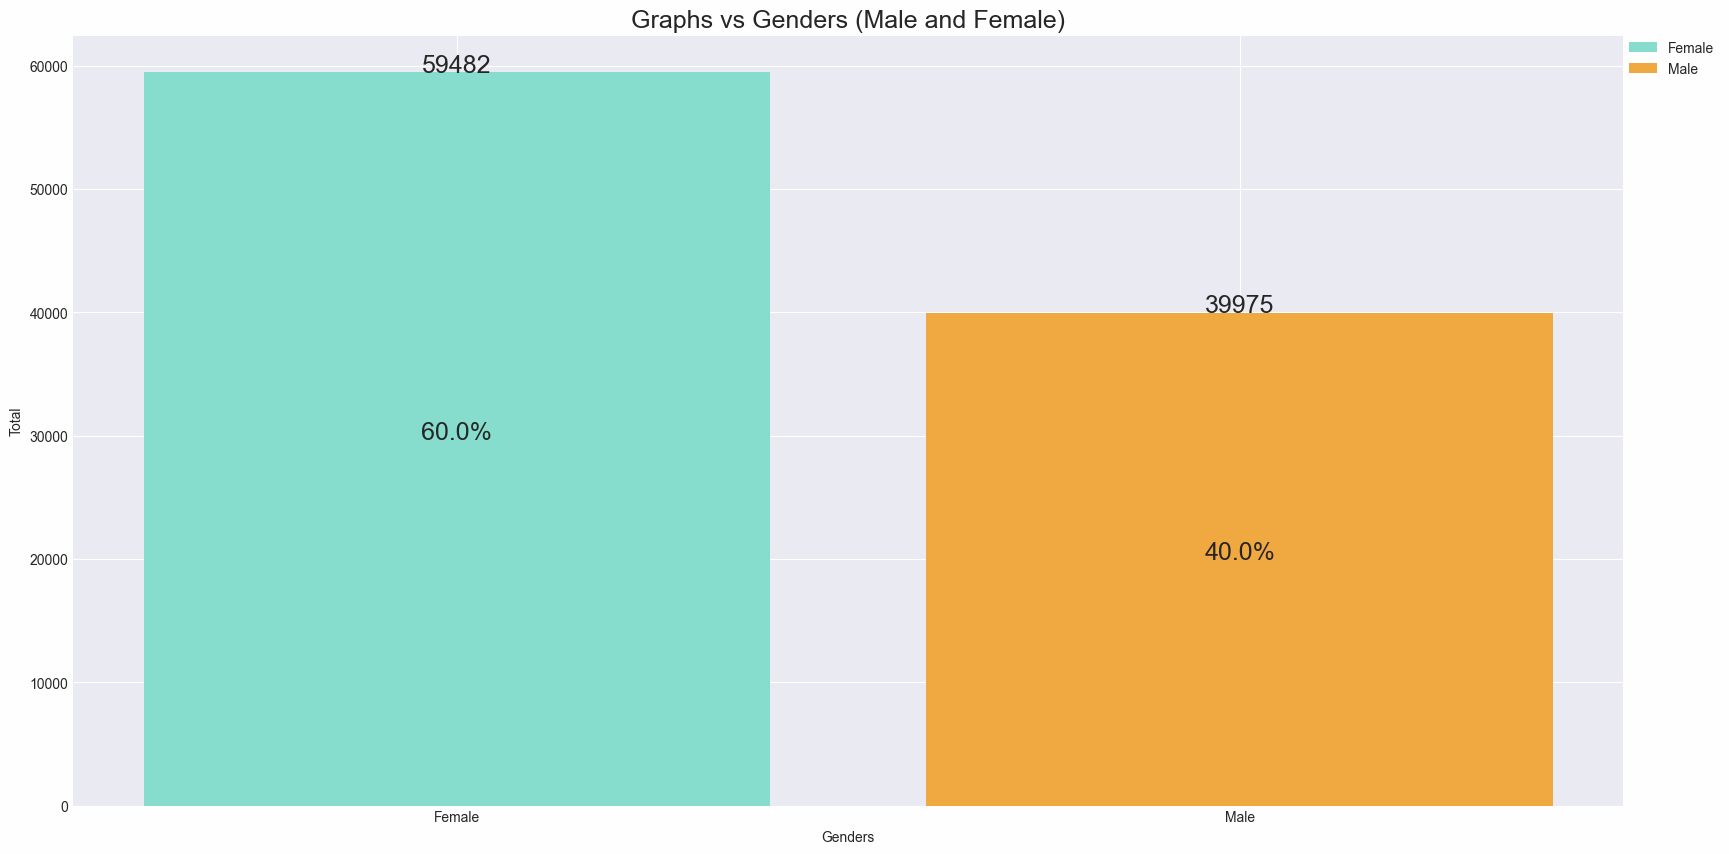

In [49]:
#Graphs Female and Male
plt.figure(figsize = (20,10))
plt.bar(list(df_gender.index),df_gender['gender'], color = colors, label =df_gender.index.tolist())
plt.title('Graphs vs Genders (Male and Female)',size=18) #Title 
plt.xlabel("Genders") #Name axis x
plt.ylabel("Total") #Name axis y
plt.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.)
showvalues(df_gender.index,df_gender['gender'],means_)




#PAYMENT METHODS
---



In [50]:
df.groupby(['gender']).payment_method.value_counts()

gender  payment_method
Female  Cash              26509
        Credit Card       21011
        Debit Card        11962
Male    Cash              17938
        Credit Card       13920
        Debit Card         8117
Name: count, dtype: int64

In [51]:
#Create a dataframe for show the total of use of each paymen methods for each gender
d2=pd.DataFrame(columns=['Genders','Payment','Quantity'])
d2.loc[0]=['Female','Cash',26509]
d2.loc[1]=['Female','Credit Card',21011]
d2.loc[2]=['Female','Debit Card',11962]
d2.loc[3]=['Male','Cash',17938]
d2.loc[4]=['Male','Credit Card',13920]
d2.loc[5]=['Male','Debit Card',8117]

In [52]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    l=[1,2,3,4,5,6]
    patch = [p for p in plot.patches]
    o=0
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}'.format(a[(j*Number_of_categories + i)])
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)

            ax.annotate(f"{round((float(percentage)/df.shape[0])*100,2)}%",(x, y/2),size=12)
            o+=1
    plt.show()

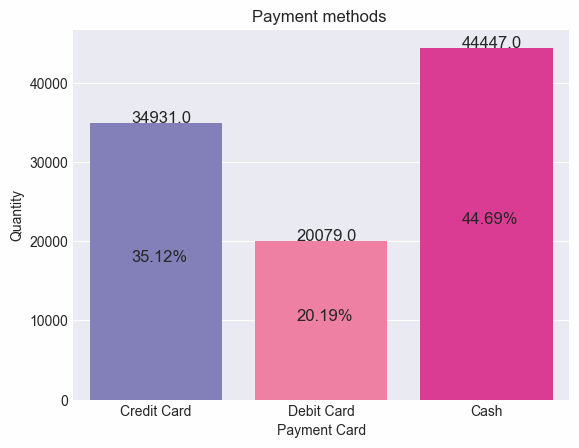

In [53]:
ax=sns.countplot(x=df["payment_method"])

plt.title('Payment methods ')
plt.xlabel('Payment Card')
plt.ylabel('Quantity')
with_hue(ax,df.payment_method,1,3)

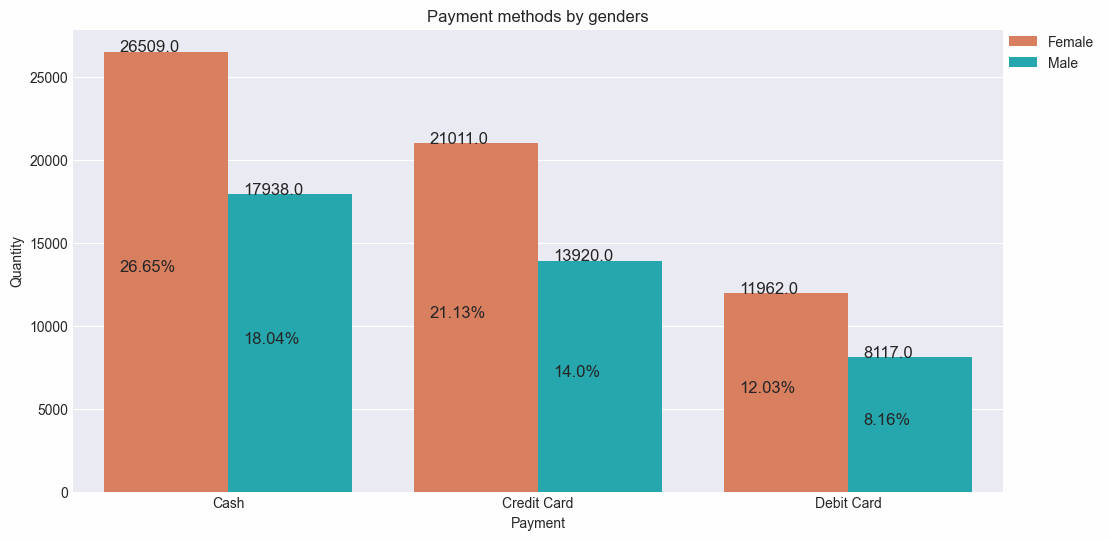

In [54]:
#Graps a bar comparision of the payment methods by genders

plt.subplots(figsize = (12, 6))
ax =sns.barplot(data=d2, x="Payment", y="Quantity", hue="Genders", palette = ['#EC754C', '#0EBCC4'])
plt.title('Payment methods by genders')
plt.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.)
with_hue(ax,d2.Quantity,3,2)


# AGE DISTRIBUTION


---



Visualization of stactitis data of age column

In [55]:
Q1, Q3 = np.percentile(df['age'], [25, 75])
Q2=df['age'].median()


valMin=df['age'].min()
valMax=df['age'].max()

RangoIQ=Q3-Q1

limiSu=Q3+1.5*RangoIQ
limiInf=Q1-1.5*RangoIQ

In [56]:
print(Q1,Q3)

30.0 56.0


([<matplotlib.axis.XTick at 0x2267366ce50>,
 [Text(-20, 0, '−20'),
  Text(0, 0, '0'),
  Text(20, 0, '20'),
  Text(40, 0, '40'),
  Text(60, 0, '60'),
  Text(80, 0, '80'),
  Text(100, 0, '100')])

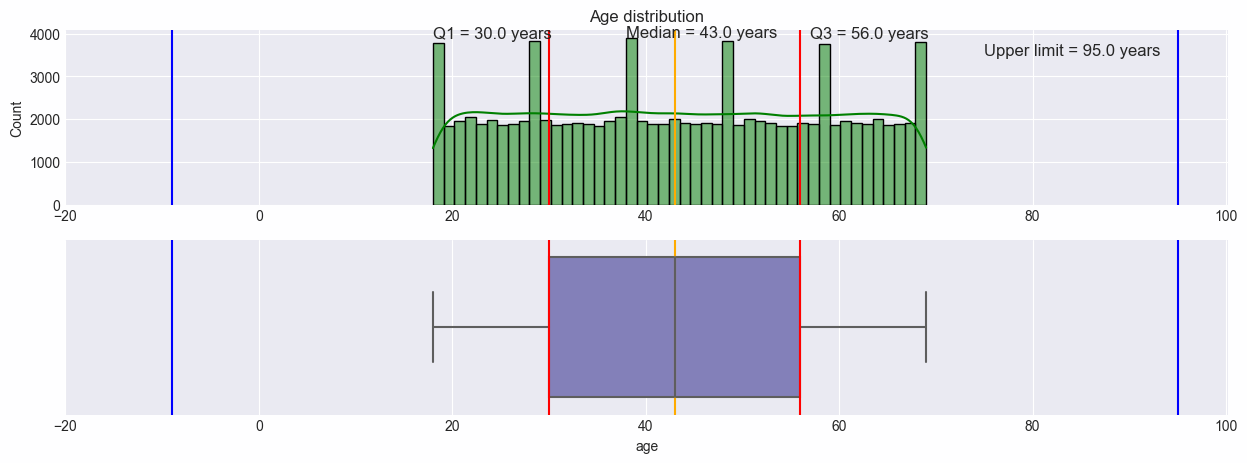

In [57]:
fig = plt.figure(figsize = (15, 5))
ax4=plt.subplot(2,1,1)
ax4 = sns.histplot(data=df, x="age", kde=True,color='green')
plt.axvline(Q3,color='red')
plt.axvline(Q1,color='red')
plt.text(Q1-12,3900,f"Q1 = {Q1} years",size =12)
plt.text(Q3+1,3900,f"Q3 = {Q3} years",size =12)

plt.axvline(df['age'].median(),color='#FFAB00')
plt.text(df['age'].median()-5,3930,f"Median = {df['age'].median()} years",size=12)
plt.axvline(limiSu,color='blue')
plt.axvline(limiInf,color='blue')
plt.title('Age distribution',size=12)
plt.xticks(np.arange(-20,101,20))
plt.xlabel("")
plt.text(limiSu-20,3500,f"Upper limit = {limiSu} years",size =12)
ax4 = plt.subplot(2,1,2)
ax4 = sns.boxplot(x=df["age"],whis=1.5)
plt.axvline(df['age'].median(),color='#FFAB00')
plt.axvline(Q3,color='red')
plt.axvline(Q1,color='red')
plt.axvline(limiSu,color='blue')
plt.axvline(limiInf,color='blue')
plt.xticks(np.arange(-20,101,20))

#PURCHASES BY YEARS

---



In [58]:
pos = np.argsort(df.year.unique())
years_or = (df.year.unique())[pos]
pos_m = np.argsort(df.month.unique())
month_or= (df.month.unique()[pos_m])
df_years = pd.DataFrame(index= month_or,columns=[years_or])


In [59]:
def bymonth (year_u,df) : 
  l_year = []
  cond1 = df.year == year_u
  for month in month_or:
    cond2 = df.month == month
    l_year.append((df.quantity[cond1&cond2]).sum())
  return l_year

In [60]:
months = np.array(['January','February','March','April','May','June','July','August','September','October','November','December'])
df_years = pd.DataFrame(index = months)

In [61]:
for year in years_or : 
  df_years[year] = bymonth(year,df)
df_years

,2021,2022,2023
January,11483,11619,11661
February,10179,10248,10916
March,11383,11949,2892
April,11270,11288,0
May,11620,11597,0
June,11352,11322,0
July,11986,11713,0
August,11205,11716,0
September,10901,11197,0
October,11711,11766,0


In [62]:
colors2 =['#000000','#004949','#009292','#490092','#006DDB','#920000','#924900','#DB6D00','#24FF24']
colors3 =  ['#EC754C', '#0EBCC4','#004949']

In [63]:
cant = df_years.loc['January',2023]

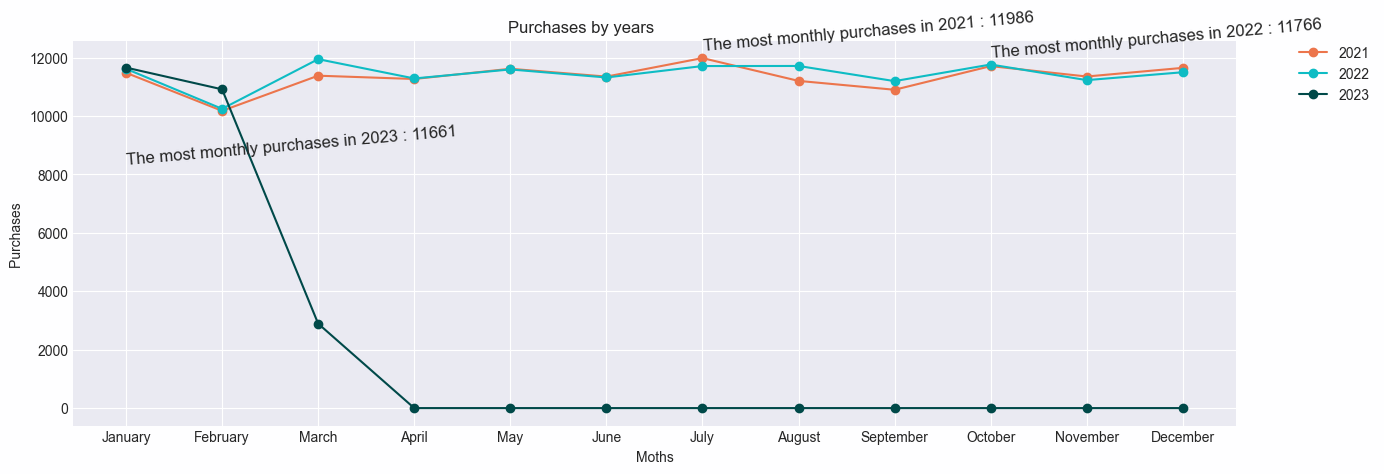

In [64]:
fig = plt.figure(figsize=(15,5))
c = 0
for year in years_or:
  plt.plot(df_years.index.tolist(), df_years[year], color=colors3[c], marker='o',label = year)
  c += 1
plt.xlabel('Moths')
plt.ylabel('Purchases ')
plt.title('Purchases by years',ha="right")
plt.text(df_years.index.tolist()[0],8350,f"The most monthly purchases in 2023 : {df_years.loc['January',2023]}",size =12,rotation=5.0)
plt.text(df_years.index.tolist()[6],12250,f"The most monthly purchases in 2021 : {df_years.loc['July',2021]}",size =12,rotation=5.0)
plt.text(df_years.index.tolist()[9],12000,f"The most monthly purchases in 2022 : {df_years.loc['October',2022]}",size =12,rotation=5.0)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [65]:
categories = np.array(df.category.unique())
df_categories = pd.DataFrame(index= month_or,columns = [categories])

In [66]:
def bymonths (catego,month_or,df) : 
  l_quanty_bymonth = []
  cond1 = df.category == catego
  for month in month_or:
    cond2 = df.month == month
    l_quanty_bymonth.append((df.quantity[cond1&cond2]).sum())
  return l_quanty_bymonth

In [67]:
for catego in categories:
  df_categories[catego] = bymonths(catego,month_or,df)
df_categories.set_index(months)

,Clothing,Shoes,Books,Cosmetics,Food & Beverage,Toys,Technology,Souvenir
January,11838,3519,1780,5441,4990,3583,1756,1856
February,10985,3093,1625,4679,4462,3186,1629,1684
March,9214,2759,1325,3981,3886,2588,1216,1255
April,8020,2235,1138,3296,3525,2154,1042,1148
May,7978,2477,1149,3478,3490,2420,1133,1092
June,7704,2285,1080,3541,3528,2250,1147,1139
July,8588,2392,1251,3399,3390,2381,1206,1092
August,7591,2415,1175,3579,3360,2320,1204,1277
September,7642,2215,1084,3459,3150,2286,1166,1096
October,8081,2379,1159,3604,3507,2327,1340,1080


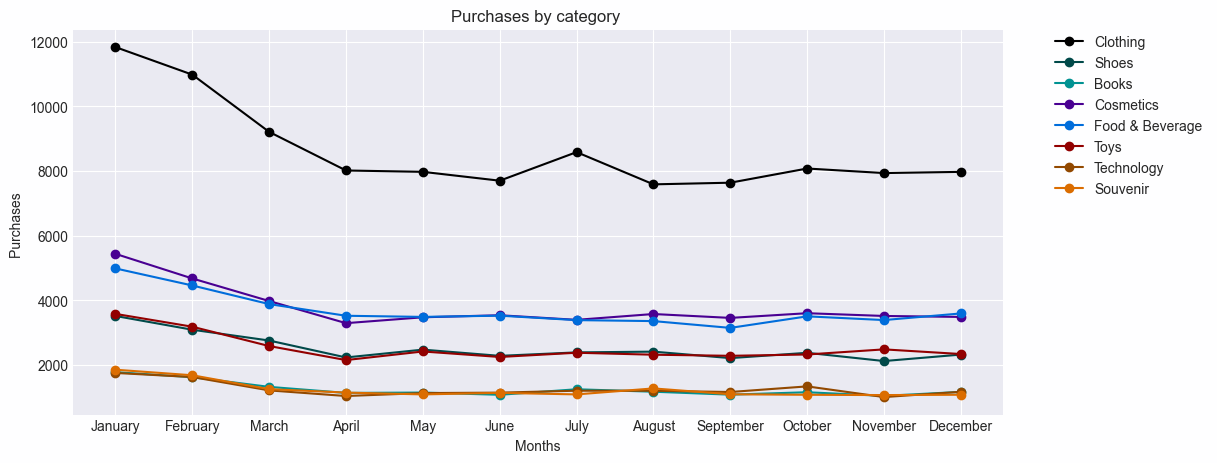

In [68]:
fig = plt.figure(figsize=(12,5))
t = 0
for catego in categories:
  plt.plot(df_years.index.tolist(), df_categories[catego], color=colors2[t], marker='o',label = catego)
  t += 1
plt.xlabel('Months')
plt.ylabel('Purchases ')
plt.title('Purchases by category ')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#STANDAR DEVIATION OF CATEGORIES

In [69]:
df.shopping_mall.unique()
len(df.shopping_mall.unique())

10

In [70]:
df['Price_by_Invoid']=df['quantity']*df['Price Dollars $']
df

,invoice_no,customer_id,gender,age,category,quantity,payment_method,invoice_date,shopping_mall,year,month,Price Dollars $,Price Turkey,Price_by_Invoid
0,I138884,C241288,Female,28,Clothing,5,Credit Card,2022-08-05,Kanyon,2022,8,78.02,1500.40,390.10
1,I317333,C111565,Male,21,Shoes,3,Debit Card,2021-12-12,Forum Istanbul,2021,12,93.63,1800.51,280.89
2,I127801,C266599,Male,20,Clothing,1,Cash,2021-11-09,Metrocity,2021,11,15.60,300.08,15.60
3,I173702,C988172,Female,66,Shoes,5,Credit Card,2021-05-16,Metropol AVM,2021,5,156.04,3000.85,780.20
4,I337046,C189076,Female,53,Books,4,Cash,2021-10-24,Kanyon,2021,10,3.15,60.60,12.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,Credit Card,2022-09-21,Kanyon,2022,9,3.05,58.65,15.25
99453,I325143,C569580,Male,27,Food & Beverage,2,Cash,2021-09-22,Forum Istanbul,2021,9,0.54,10.46,1.08
99454,I824010,C103292,Male,63,Food & Beverage,2,Debit Card,2021-03-28,Metrocity,2021,3,0.54,10.46,1.08
99455,I702964,C800631,Male,56,Technology,4,Cash,2021-03-16,Istinye Park,2021,3,218.40,4200.00,873.60


In [71]:
def get_mean(df,catego) :
  mean = (df.Price_by_Invoid[df.category==catego]).mean().round(2)
  max = (df.Price_by_Invoid[df.category==catego]).max().round(2)
  min = (df.Price_by_Invoid[df.category==catego]).min().round(2)
  return (mean,max,min)
l_mean = [] ; l_max= [] ; l_min=[]
for catego in categories : 
  l_mean.append((get_mean(df,catego))[0])
  l_max.append((get_mean(df,catego))[1])
  l_min.append((get_mean(df,catego))[2])
print(l_mean)
print(l_max)
print(l_min)

[171.89, 344.91, 8.71, 23.4, 2.99, 20.52, 602.25, 6.61]
[390.1, 780.2, 19.7, 52.85, 6.8, 46.6, 1365.0, 15.25]
[15.6, 31.21, 0.79, 2.11, 0.27, 1.86, 54.6, 0.61]


In [72]:
df.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'payment_method', 'invoice_date', 'shopping_mall', 'year', 'month',
       'Price Dollars $', 'Price Turkey', 'Price_by_Invoid'],
      dtype='object')

,Clothing,Shoes,Books,Cosmetics,Food & Beverage,Toys,Technology,Souvenir
means,171.89,344.91,8.71,23.4,2.99,20.52,602.25,6.61
max,390.1,780.2,19.7,52.85,6.8,46.6,1365.0,15.25
min,15.6,31.21,0.79,2.11,0.27,1.86,54.6,0.61


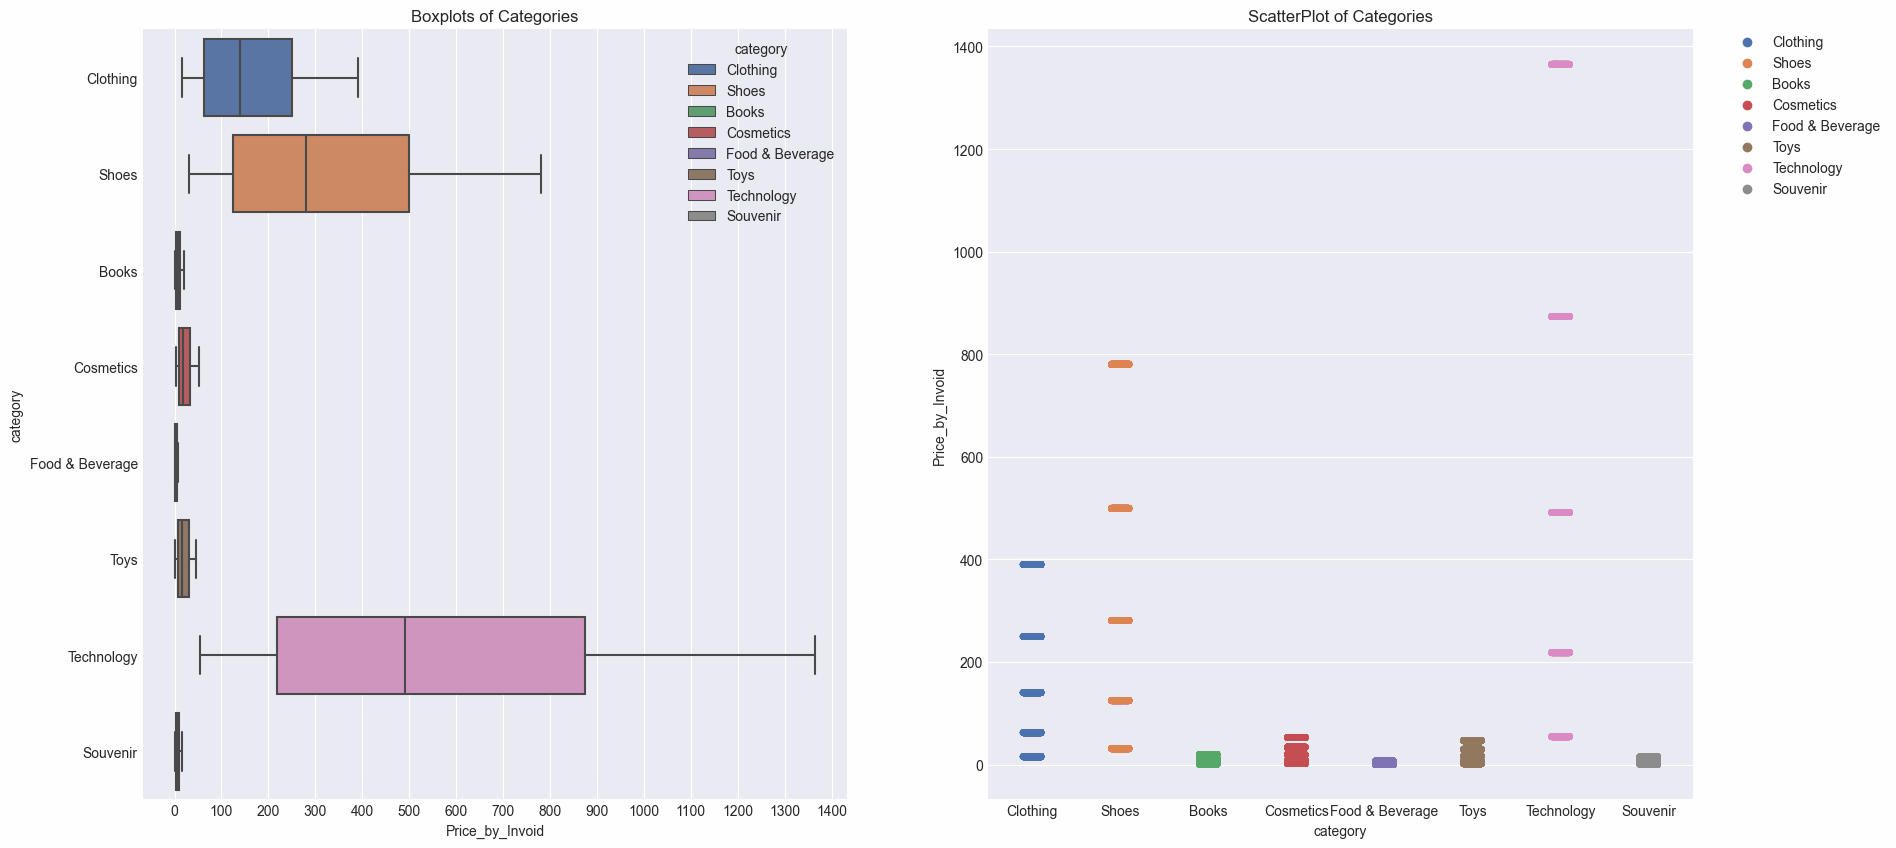

In [73]:
fig_pre  = plt.figure(figsize=(20,10))
ax3 = plt.subplot(1,2,1)
ax3 = sns.boxplot(data=df, x="Price_by_Invoid", y="category", hue="category",palette="deep", dodge=False)
ax3.set_xticks(np.arange(0,1401,100))
plt.title("Boxplots of Categories")
ax3 = plt.subplot(1,2,2)
ax3 = sns.stripplot(data=df, x="category", y="Price_by_Invoid", hue="category", palette="deep")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("ScatterPlot of Categories")
df_mean_categori = pd.DataFrame(index =['means','max','min'],columns=[categories])
df_mean_categori.iloc[0] = l_mean
df_mean_categori.iloc[1] = l_max
df_mean_categori.iloc[2] = l_min
df_mean_categori


In [74]:
s = df.groupby('category')['Price_by_Invoid'].std().round(2).sort_values(ascending=True)
s

category
Food & Beverage      2.36
Souvenir             5.26
Books                6.86
Toys                15.99
Cosmetics           18.30
Clothing           135.07
Shoes              269.41
Technology         471.67
Name: Price_by_Invoid, dtype: float64

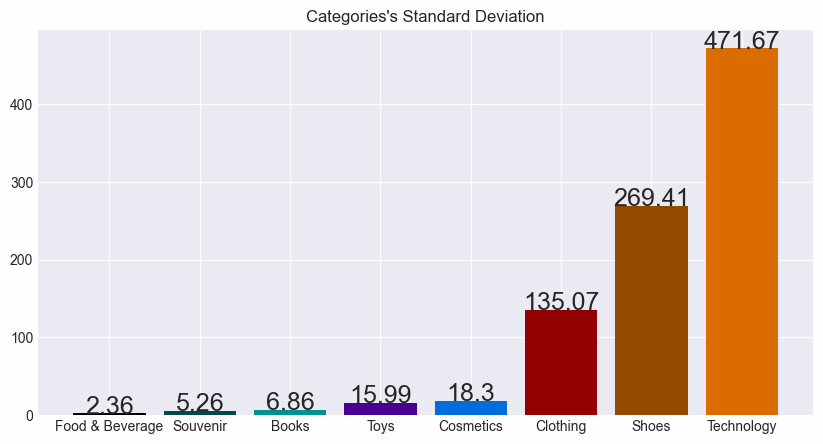

In [75]:
plt.figure(figsize=(10,5))
plt.bar(s.index,s.values,color = colors2)
plt.title("Categories's Standard Deviation")
showvalues_1 (s.index,s.values)




#PURCHASES BY SHOPPING MALLS

---



In [76]:
total_shp1 = len(df[df.shopping_mall=="Cevahir AVM"])
total_shp2 = len(df[df.shopping_mall=="Zorlu Center"])
df_shops = pd.DataFrame(columns=["Purchases"])
df_shops.loc["Cevahir AVM"] = total_shp1
df_shops.loc["Zorlu Center"] = total_shp2

In [77]:
m1 = str(round((total_shp1/(total_shp1+total_shp2))*100,2))+"%"
m2 = str(round((total_shp2/(total_shp1+total_shp2))*100,2))+"%"
mean_shps = [m1,m2]

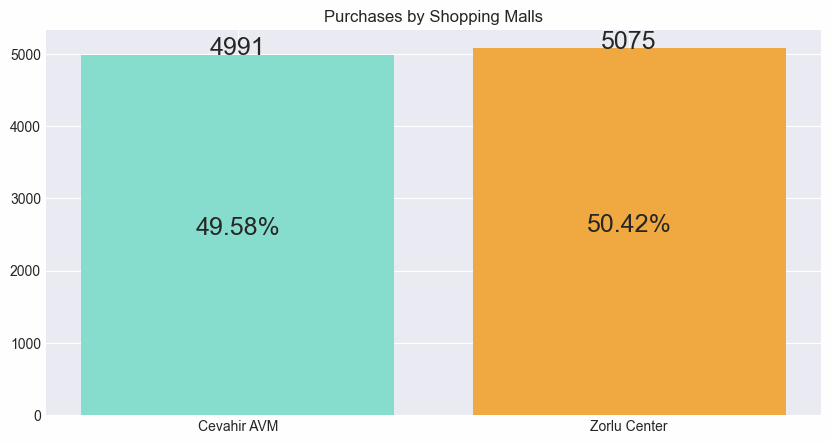

In [78]:
plt.figure(figsize=(10,5))
plt.bar(df_shops.index,df_shops.Purchases,color = colors)
plt.title("Purchases by Shopping Malls")
showvalues (df_shops.index,df_shops.Purchases,mean_shps)
